In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns 

In [13]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [14]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
X = df.iloc[:, :-1]  
y = df.iloc[:, -1]   
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [17]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7100

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.72      0.76       151
           1       0.57      0.70      0.63        80

    accuracy                           0.71       231
   macro avg       0.69      0.71      0.69       231
weighted avg       0.73      0.71      0.72       231



In [19]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(clf, X_scaled, y, cv=kf, scoring="accuracy")

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation: {np.std(cv_scores):.4f}")

Cross-Validation Scores: [0.74675325 0.72077922 0.72077922 0.73202614 0.68627451]
Mean Accuracy: 0.7213
Standard Deviation: 0.0200


In [20]:
confusion_matrix(y_test,clf.predict(X_test))

array([[108,  43],
       [ 24,  56]])

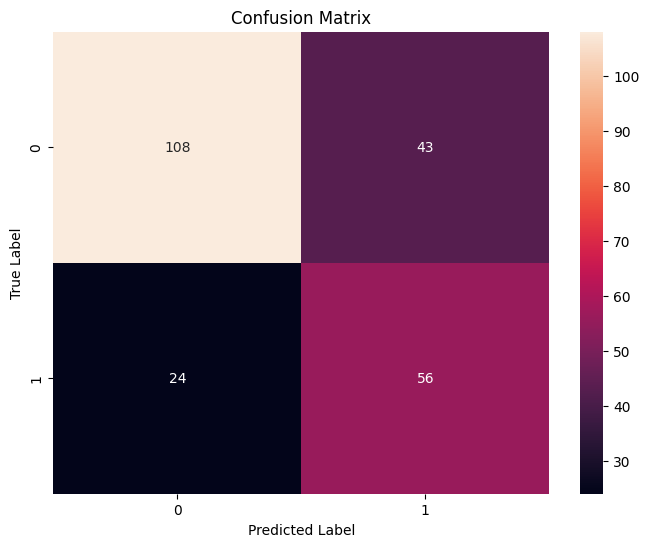

In [26]:
cm = confusion_matrix(y_test, clf.predict(X_test))

plt.figure(figsize=(8, 6))  
sns.heatmap(cm, annot=True, fmt='d')  
plt.xlabel('Predicted Label')  
plt.ylabel('True Label')       
plt.title('Confusion Matrix')  
plt.show() 

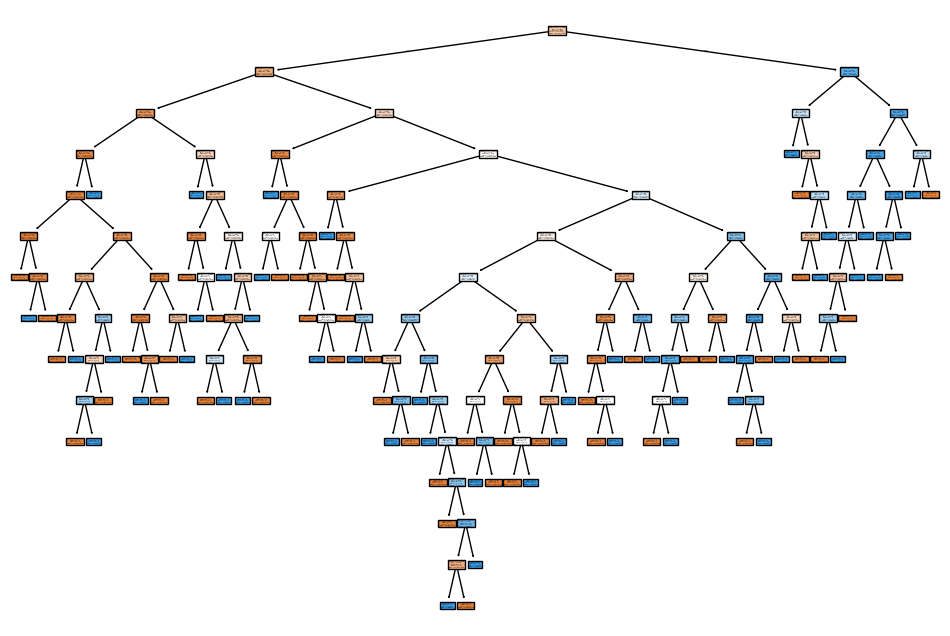

In [22]:
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=[f"Feature {i}" for i in range(X.shape[1])], 
          class_names=["No Diabetes", "Diabetes"], filled=True)
plt.show()